In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [62]:
data_feature = pd.read_csv('file/data_feature.csv')


In [63]:
data_feature

,abidin,add,aduh,agian,agst,agustus,ahmad,akses,aktifin,akur,...,xx,xxx,ya,yah,yak,yaw,ygcabang,yulia,zenfone,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.333683,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
21074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
21075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
21076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0


# Modeling Machine Learning

In [64]:
x = data_feature.drop(columns='label').values
y = data_feature.label.values

In [65]:
from sklearn.model_selection import train_test_split
# Proses memisahkan data uji dan data latih. Perbandingan 80:20
# Random_state digunakan untuk internal random generator

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

## Naive Bayes

In [67]:
from sklearn.naive_bayes import MultinomialNB           # Pilih salah satu algoritma pembelajaran

# Training the model
algorithm = MultinomialNB()               # Load algoritma pembelajaran tertentu
model = algorithm.fit(X_train, y_train)   # Fitkan (latih) algoritman menggunakan data latih & label latih 


## KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier as KNC

knn = KNC(n_neighbors=1)
model_knn = knn.fit(X_train,y_train)


# Model Evaluation

In [50]:
def predictResult(model):
  ### Hasil menggunakan Naive Bayes
  # Gunakan model yang telah di latih untuk prediksi pada data uji
  model_pred = model.predict(X_test)

  # Tampilkan hasil prediksi model
  model_pred
  # Label sebenarnya (actual label)
  y_test
  # Hitung berapa jumlah data yang berhasil di prediksi model & jumlah data yang salah
  prediksi_benar = (model_pred == y_test).sum()
  prediksi_salah = (model_pred != y_test).sum()
  print("========================")
  print('Jumlah prediksi benar\t:', prediksi_benar)
  print('Jumlah prediksi salah\t:', prediksi_salah)

  accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
  print('Accuracy pengujian\t:', accuracy, '%')
  from sklearn.metrics import confusion_matrix
  print("========================")
  cm = confusion_matrix(y_test, model_pred)
  print('Confusion matrix:\n', cm)
  from sklearn.metrics import classification_report
  print("========================")
  print('Classification report:\n', classification_report(y_test, model_pred))
  # Cross Validation
  print("========================")
  from sklearn.model_selection import ShuffleSplit    # bisa pilih beberapa teknik cross validation
  from sklearn.model_selection import cross_val_score # untuk mengetahui performa model pada cross validation

  cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

  cv_accuracy = (cross_val_score(model, x, y, cv=cv, scoring='accuracy'))
  avg_accuracy = np.mean(cv_accuracy)

  print('Accuracy setiap split:', cv_accuracy, '\n')
  print('Rata-rata Accuracy cross validation:', avg_accuracy)

In [51]:
print("Hasil Naive Bayes")
predictResult(model)

Hasil Naive Bayes
Jumlah prediksi benar	: 3687
Jumlah prediksi salah	: 529
Accuracy pengujian	: 87.45256166982922 %
Confusion matrix:
 [[ 529  468]
 [  61 3158]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.53      0.67       997
           1       0.87      0.98      0.92      3219

    accuracy                           0.87      4216
   macro avg       0.88      0.76      0.79      4216
weighted avg       0.88      0.87      0.86      4216

Accuracy setiap split: [0.86527514 0.87025617 0.86124288 0.8607685  0.86574953 0.86385199
 0.86480076 0.86574953 0.87950664 0.86432638] 

Rata-rata Accuracy cross validation: 0.86615275142315


In [54]:
print('Hasil KNN :')
predictResult(model_knn)

Hasil KNN :
Jumlah prediksi benar	: 3993
Jumlah prediksi salah	: 223
Accuracy pengujian	: 94.71062618595826 %
Confusion matrix:
 [[ 852  145]
 [  78 3141]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       997
           1       0.96      0.98      0.97      3219

    accuracy                           0.95      4216
   macro avg       0.94      0.92      0.92      4216
weighted avg       0.95      0.95      0.95      4216

Accuracy setiap split: [0.94473435 0.92647059 0.94497154 0.91888046 0.93785579 0.94093928
 0.94283681 0.94402277 0.94710626 0.94686907] 

Rata-rata Accuracy cross validation: 0.9394686907020873


## Mencari nilai K Terbaik

In [55]:
from sklearn import metrics
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
confussionMx = [];

for n in range(1, Ks):
  neighbor = KNC(n_neighbors = n).fit(X_train,y_train)
  yhat = neighbor.predict(X_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)
  std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.94710626, 0.91911765, 0.903463  , 0.89112903, 0.87926945,
       0.87523719, 0.83704934, 0.83942125, 0.82234345, 0.82779886])

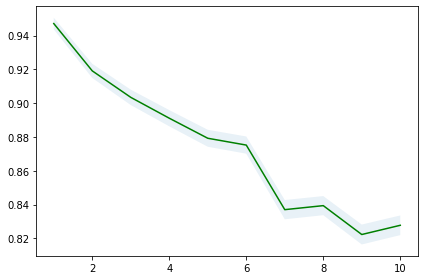

In [56]:
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc, mean_acc+1*std_acc, alpha =  0.10)
plt.tight_layout()
plt.show()

# Resume
data yang digunakan merupakan dataset Review Product yang sudah melalui Preprocessing Data dan Feature Enginering.

Pada tahap modeling menggunakan Machine Learning saya menggunakan 2 algoritma, yaitu Naive Bayes dan KNN. 

Dalam perbandingan algoritma, KNN mendapatkan hasil akurasi yang lebih tinggi dibandingkan naive bayes, dimana Naive Bayes mendapatkan akurasi sebesar 87.45256166982922 %, sedangkan KNN mendapat akurasi sebesar  94.71062618595826 %

Pada algoritma KNN juga dilakukan pencarian nilai K yang menghasilkan akurasi terbesar, dan dari grafik nilai akurasi terbesar didapatkan pada nilai K = 1 